Features used: ['PatientID', 'lag1_max_q1_2', 'lag1_mean_d_q2q4_2', 'lag1_std_2', 'lag1_mean_q1_2', 'lag1_mean_q2_2', 'lag1_mean_d_h2h1_2', 'lag1_mean_2', 'lag1_mean_d_q2q4_1', 'lag1_std_d_h2h1_2', 'lag1_mean_d_h2h1_1', 'lag1_std_1', 'lag1_mean_q2_1', 'lag1_mean_q1_1', 'lag1_std_d_h2h1_1', 'lag1_max_q1_3', 'lag1_mean_1', 'lag1_mean_q2_3', 'lag1_mean_q1_3', 'lag1_mean_d_q2q4_0', 'lag1_mean_d_q2q4_3', 'lag1_std_d_h2h1_0', 'lag1_mean_3', 'lag1_std_d_h2h1_3', 'lag1_mean_q1_0', 'lag1_mean_q2_0', 'lag1_std_0', 'lag1_mean_d_h2h1_3', 'lag1_std_3', 'lag1_mean_d_h2h1_0', 'Sedation_Score', 'EEG_Intensity', 'freq_750_3', 'freq_740_3', 'freq_730_3', 'freq_720_3', 'freq_709_3', 'freq_699_3', 'freq_689_3', 'freq_679_3', 'freq_669_3', 'freq_659_3', 'freq_649_3', 'freq_639_3', 'lag1_skew_3', 'lag1_skew_2', 'lag1_skew_1', 'lag1_skew_0']

Model Accuracy: 94.76 %

Single Patient Prediction
LOC Probability: 5.9 %
CON Probability: 94.1 %
Decision: CON → WAIT, give more anesthesia


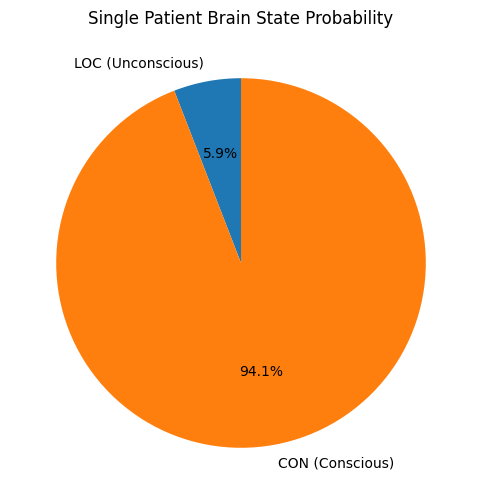

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load dataset
# -----------------------------
data = pd.read_csv(r"C:\Users\PC\Downloads\dataset_kaggle_friendly.csv")


# -----------------------------
# 2. Use only LOC & CON
# -----------------------------
data = data[data["Brain_State"] != "SEMI_LOC"]

# Encode labels: LOC=0, CON=1
le = LabelEncoder()
data["Brain_State"] = le.fit_transform(data["Brain_State"])

# -----------------------------
# 3. Features & Target
# -----------------------------
X = data.drop(["Brain_State", "Anesthesia_Level"], axis=1)
y = data["Brain_State"]

print("Features used:", list(X.columns))

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Train Model
# -----------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 6. Accuracy
# -----------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(acc*100, 2), "%")

# -----------------------------
# 7. SINGLE PATIENT PREDICTION
# -----------------------------
sample = X_test.iloc[[0]]

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0]

# Keep only LOC & CON probs
prob2 = prob[:2]
prob2 = prob2 / prob2.sum()   # normalize

print("\nSingle Patient Prediction")
print("LOC Probability:", round(prob2[0]*100,1), "%")
print("CON Probability:", round(prob2[1]*100,1), "%")

if prob2[0] > prob2[1]:
    print("Decision: LOC → SAFE to perform surgery")
else:
    print("Decision: CON → WAIT, give more anesthesia")

# -----------------------------
# 8. PIE CHART
# -----------------------------
labels = ["LOC (Unconscious)", "CON (Conscious)"]

plt.figure(figsize=(6,6))
plt.pie(prob2, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Single Patient Brain State Probability")
plt.show()
